# Predicción de indice contaminante

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm


In [2]:
# Importar datos
indice_contaminacion = pd.read_csv(r'indice_contaminacion.csv')
solicitud_locatel = pd.read_csv(r"Solicitud_Locatel.csv")
tiempo = pd.read_csv(r"Tiempo.csv")
zona = pd.read_csv(r"Zona.csv")
tipo_contaminante = pd.read_csv(r"Tipo Contaminante.csv")

In [3]:
# Observar datos
indice_contaminacion.head()


,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo
0,0,NaN,36,0,0,1
1,1,5.0,1,0,0,0
2,2,NaN,38,0,0,1
3,3,10.0,15,0,0,0
4,4,64.0,22,0,0,0


In [4]:
solicitud_locatel

,idSolicitud,tipoEntrada,estatusSolicitud,sexo,edad,idZona,idTiempo
0,0,USUARIOS SUAC DEPENDENCIA,ATENDIDO,MASCULINO,NaN,2,4623
1,1,PORTAL CIUDADANO SUAC,ATENDIDO,FEMENINO,NaN,3,3683
2,2,PORTAL CIUDADANO SUAC,ATENDIDO,FEMENINO,60.0,3,3683
3,3,OPERADOR TELEFÓNICO LOCATEL,ATENDIDO,FEMENINO,23.0,1,3683
4,4,PORTAL CIUDADANO SUAC,ATENDIDO,NO ESPECIFICADO,NaN,3,3683
...,...,...,...,...,...,...,...
82016,82016,PORTAL CIUDADANO SUAC,CERRADO,NaN,NaN,0,31650
82017,82017,PORTAL CIUDADANO SUAC,CERRADO,NaN,NaN,0,31651
82018,82018,PORTAL CIUDADANO SUAC,TURNADO,NaN,NaN,0,31739
82019,82019,PORTAL CIUDADANO SUAC,TURNADO,NaN,NaN,1,31793


In [5]:
tiempo.head()

,idTiempo,año,semestre,trimestre,bimestre,mes,dia,hora,esFestivo
0,0,2019,1,1,1,1,1,0,1
1,1,2019,1,1,1,1,1,1,1
2,2,2019,1,1,1,1,1,2,1
3,3,2019,1,1,1,1,1,3,1
4,4,2019,1,1,1,1,1,4,1


In [6]:
tipo_contaminante.head()

,idTipoContaminante,nombreContaminante,tipoPeligrosidad
0,0,ozono,0
1,1,dióxido de azufre,0
2,2,dióxido de nitrógeno,0
3,3,monóxido de carbono,0
4,4,PM10,0


In [7]:
# Reemplazar idZona con nombre de zona desde dataframe Zona
# Hacer diccionario con idZona y nombre de zona
zona_dict = dict(zip(zona.idZona, zona.zonaCDMX))
zona_dict

# Reemplazar idZona con nombre de zona
indice_contaminacion['nombreZona'] = indice_contaminacion['idZona'].map(zona_dict)
indice_contaminacion

# Hacer diccionario con tiempo idTiempo,año,semestre,trimestre,bimestre,mes,dia,hora,esFestivo
tiempo_dict_anio = dict(zip(tiempo.idTiempo, tiempo.año))
tiempo_dict_mes = dict(zip(tiempo.idTiempo, tiempo.mes))
tiempo_dict_dia = dict(zip(tiempo.idTiempo, tiempo.dia))

# Reemplazar idTiempo con año
indice_contaminacion['año'] = indice_contaminacion['idTiempo'].map(tiempo_dict_anio)
indice_contaminacion['mes'] = indice_contaminacion['idTiempo'].map(tiempo_dict_mes)
indice_contaminacion['dia'] = indice_contaminacion['idTiempo'].map(tiempo_dict_dia)

# Juntar dia, mes y año en una sola columna y eliminar las otras 3
indice_contaminacion['fecha'] = indice_contaminacion['dia'].astype(str) + '-' + indice_contaminacion['mes'].astype(str) + '-' + indice_contaminacion['año'].astype(str)

# Convertir fecha a datetime
indice_contaminacion['fecha'] = pd.to_datetime(indice_contaminacion['fecha'], format='%d-%m-%Y')
indice_contaminacion = indice_contaminacion.drop(['dia', 'mes', 'año'], axis=1)


# Reemplazar idTipoContaminante con nombre de tipo de contaminante desde dataframe Tipo Contaminante idTipoContaminante,nombreContaminante,tipoPeligrosidad
# Hacer diccionario con idTipoContaminante y nombre de tipo de contaminante
tipo_contaminante_dict = dict(zip(tipo_contaminante.idTipoContaminante, tipo_contaminante.nombreContaminante))

# Reemplazar idTipoContaminante con nombre de tipo de contaminante
indice_contaminacion['tipoContaminante'] = indice_contaminacion['idTipoContaminante'].map(tipo_contaminante_dict)


# Revisar nulos
indice_contaminacion.isnull().sum()

idContaminacion           0
indiceContaminante    17558
idTipoContaminante        0
idZona                    0
idTiempo                  0
esNulo                    0
nombreZona                0
fecha                     0
tipoContaminante          0
dtype: int64

In [8]:
# Revisar que tipoContaminante y zona tiene mas nulos
indice_contaminacion


,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo,nombreZona,fecha,tipoContaminante
0,0,NaN,36,0,0,1,Noroeste,2019-01-01,ozono
1,1,5.0,1,0,0,0,Noroeste,2019-01-01,dióxido de azufre
2,2,NaN,38,0,0,1,Noroeste,2019-01-01,dióxido de nitrógeno
3,3,10.0,15,0,0,0,Noroeste,2019-01-01,monóxido de carbono
4,4,64.0,22,0,0,0,Noroeste,2019-01-01,PM10
...,...,...,...,...,...,...,...,...,...
964075,964075,4.0,1,4,32135,0,Sureste,2022-08-31,dióxido de azufre
964076,964076,13.0,2,4,32135,0,Sureste,2022-08-31,dióxido de nitrógeno
964077,964077,4.0,3,4,32135,0,Sureste,2022-08-31,monóxido de carbono
964078,964078,30.0,10,4,32135,0,Sureste,2022-08-31,PM10


In [9]:
indice_contaminacion['indiceContaminante_nulos'] = indice_contaminacion['indiceContaminante'].isna()

In [10]:
tipoContaminante_nulos = indice_contaminacion.groupby('tipoContaminante').sum()['indiceContaminante_nulos']
nombreZona_nulos = indice_contaminacion.groupby('nombreZona').sum()['indiceContaminante_nulos']
nulos_por_tipo_y_zona = indice_contaminacion.groupby(['tipoContaminante', 'nombreZona']).sum()['indiceContaminante_nulos']

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\501219072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipoContaminante_nulos = indice_contaminacion.groupby('tipoContaminante').sum()['indiceContaminante_nulos']
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\501219072.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nombreZona_nulos = indice_contaminacion.groupby('nombreZona').sum()['indiceContaminante_nulos']
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\501219072.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only 

In [11]:

print("Tipo de contaminante y zona con más nulos: ", nulos_por_tipo_y_zona)

Tipo de contaminante y zona con más nulos:  tipoContaminante      nombreZona
PM10                  Centro           5
                      Noreste        161
                      Noroeste        73
                      Sureste        907
                      Suroeste       201
PM25                  Centro         260
                      Noreste        225
                      Noroeste      1738
                      Sureste         82
                      Suroeste       189
dióxido de azufre     Centro           1
                      Noreste          0
                      Noroeste         1
                      Sureste         16
                      Suroeste         1
dióxido de nitrógeno  Centro         704
                      Noreste        728
                      Noroeste       744
                      Sureste        755
                      Suroeste       735
monóxido de carbono   Centro        1195
                      Noreste       1226
                     

In [12]:
# Promedio de indice por cada tipo de contaminante
indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1576927866.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']


tipoContaminante
PM10                    58.397928
PM25                    65.400193
dióxido de azufre        8.169201
dióxido de nitrógeno    13.260340
monóxido de carbono      4.745366
ozono                   30.156003
Name: indiceContaminante, dtype: float64

In [13]:
# Interpolar nulos por tipo de contaminante y zona
indice_contaminacion['indiceContaminante'] = indice_contaminacion.groupby(['tipoContaminante', 'nombreZona'])['indiceContaminante'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

In [14]:
# Promedio de indice por cada tipo de contaminante
indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1576927866.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']


tipoContaminante
PM10                    58.233333
PM25                    65.258508
dióxido de azufre        8.169399
dióxido de nitrógeno    13.255887
monóxido de carbono      4.765686
ozono                   29.846440
Name: indiceContaminante, dtype: float64

In [15]:
# Revisar nulos
indice_contaminacion.isnull().sum()

# iniciar el dataframe desde 2019-01-01, recortar los datos anteriores
indice_contaminacion = indice_contaminacion[indice_contaminacion['fecha'] >= '2019-01-01']
indice_contaminacion

,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo,nombreZona,fecha,tipoContaminante,indiceContaminante_nulos
0,0,6.0,36,0,0,1,Noroeste,2019-01-01,ozono,True
1,1,5.0,1,0,0,0,Noroeste,2019-01-01,dióxido de azufre,False
2,2,17.0,38,0,0,1,Noroeste,2019-01-01,dióxido de nitrógeno,True
3,3,10.0,15,0,0,0,Noroeste,2019-01-01,monóxido de carbono,False
4,4,64.0,22,0,0,0,Noroeste,2019-01-01,PM10,False
...,...,...,...,...,...,...,...,...,...,...
964075,964075,4.0,1,4,32135,0,Sureste,2022-08-31,dióxido de azufre,False
964076,964076,13.0,2,4,32135,0,Sureste,2022-08-31,dióxido de nitrógeno,False
964077,964077,4.0,3,4,32135,0,Sureste,2022-08-31,monóxido de carbono,False
964078,964078,30.0,10,4,32135,0,Sureste,2022-08-31,PM10,False


In [16]:
# En Solicitud_Locatel reemplazar idZona,idTiempo con nombre de zona y año
# Hacer diccionario con idZona y nombre de zona
zona_dict = dict(zip(zona.idZona, zona.zonaCDMX))

# Reemplazar idZona con nombre de zona
solicitud_locatel['nombreZona'] = solicitud_locatel['idZona'].map(zona_dict)

# Hacer diccionario con tiempo idTiempo,año,semestre,trimestre,bimestre,mes,dia,hora,esFestivo
tiempo_dict_anio = dict(zip(tiempo.idTiempo, tiempo.año))
tiempo_dict_mes = dict(zip(tiempo.idTiempo, tiempo.mes))
tiempo_dict_dia = dict(zip(tiempo.idTiempo, tiempo.dia))

# Reemplazar idTiempo con año
solicitud_locatel['año'] = solicitud_locatel['idTiempo'].map(tiempo_dict_anio)
solicitud_locatel['mes'] = solicitud_locatel['idTiempo'].map(tiempo_dict_mes)
solicitud_locatel['dia'] = solicitud_locatel['idTiempo'].map(tiempo_dict_dia)

# Juntar dia, mes y año en una sola columna y eliminar las otras 3
solicitud_locatel['fecha'] = solicitud_locatel['dia'].astype(str) + '/' + solicitud_locatel['mes'].astype(str) + '/' + solicitud_locatel['año'].astype(str)
solicitud_locatel = solicitud_locatel.drop(['dia', 'mes', 'año'], axis=1)

# Convertir fecha a datetime
solicitud_locatel['fecha'] = pd.to_datetime(solicitud_locatel['fecha'], format='%d/%m/%Y')

# Interpolar los nulos de edad
solicitud_locatel['edad'] = solicitud_locatel['edad'].interpolate(method='linear', limit_direction='both')

# Revisar nulos
solicitud_locatel.isnull().sum()

# Cambiar nulls de sexo por 'No especificado'
solicitud_locatel['sexo'] = solicitud_locatel['sexo'].fillna('No especificado')



In [17]:
# Revisar nulos
print("Los nulos para locatel son:", solicitud_locatel.isnull().sum())
print("Los nulos para indice contaminacion son:", indice_contaminacion.isnull().sum())

Los nulos para locatel son: idSolicitud         0
tipoEntrada         0
estatusSolicitud    0
sexo                0
edad                0
idZona              0
idTiempo            0
nombreZona          0
fecha               0
dtype: int64
Los nulos para indice contaminacion son: idContaminacion             0
indiceContaminante          0
idTipoContaminante          0
idZona                      0
idTiempo                    0
esNulo                      0
nombreZona                  0
fecha                       0
tipoContaminante            0
indiceContaminante_nulos    0
dtype: int64


In [18]:
# Unir los datasets en base a idZona y idTiempo

merged_data = pd.merge(solicitud_locatel, indice_contaminacion, on=['idZona', 'idTiempo'],suffixes=('', '_y'))


print(merged_data)

        idSolicitud                tipoEntrada estatusSolicitud  \
0                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
1                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
2                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
3                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
4                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
...             ...                        ...              ...   
492121        82004      PORTAL CIUDADANO SUAC          CERRADO   
492122        82004      PORTAL CIUDADANO SUAC          CERRADO   
492123        82004      PORTAL CIUDADANO SUAC          CERRADO   
492124        82004      PORTAL CIUDADANO SUAC          CERRADO   
492125        82004      PORTAL CIUDADANO SUAC          CERRADO   

                   sexo  edad  idZona  idTiempo nombreZona      fecha  \
0             MASCULINO  60.0       2      4623     Centro 2019-07-12   
1             MASCULINO  60.0       2      4623  

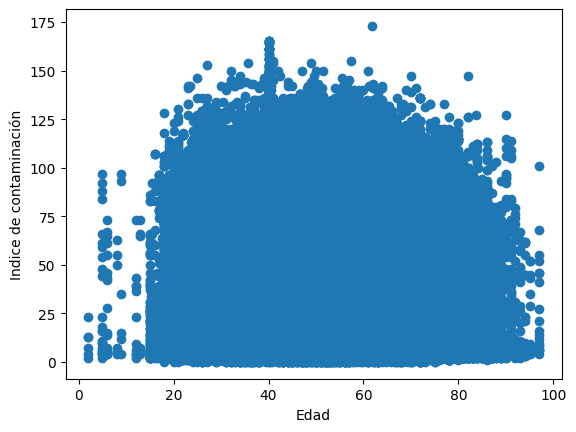

In [19]:
# Gráfico de dispersión
plt.scatter(merged_data['edad'], merged_data['indiceContaminante'])
plt.xlabel('Edad')
plt.ylabel('Indice de contaminación')
plt.show()

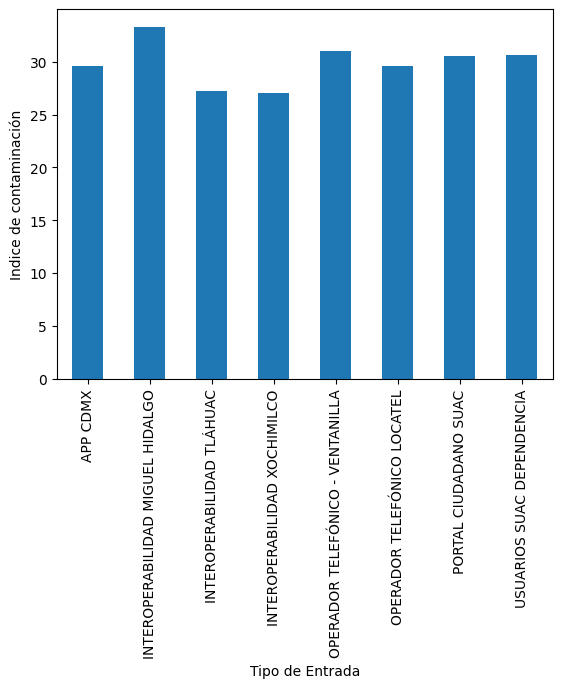

In [20]:
# Gráfico de barras
merged_data.groupby(['tipoEntrada'])['indiceContaminante'].mean().plot(kind='bar')
plt.xlabel('Tipo de Entrada')
plt.ylabel('Indice de contaminación')
plt.show()

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\3021531775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


                          idSolicitud      edad    idZona  idTiempo  \
idSolicitud                  1.000000 -0.284686  0.068621  0.990295   
edad                        -0.284686  1.000000 -0.028027 -0.288313   
idZona                       0.068621 -0.028027  1.000000  0.051477   
idTiempo                     0.990295 -0.288313  0.051477  1.000000   
idContaminacion              0.990295 -0.288313  0.051507  1.000000   
indiceContaminante          -0.016542 -0.004049 -0.067909 -0.007685   
idTipoContaminante          -0.009933 -0.002606 -0.040671 -0.006321   
esNulo                      -0.011122  0.003688 -0.023511 -0.013019   
indiceContaminante_nulos    -0.011122  0.003688 -0.023511 -0.013019   

                          idContaminacion  indiceContaminante  \
idSolicitud                      0.990295           -0.016542   
edad                            -0.288313           -0.004049   
idZona                           0.051507           -0.067909   
idTiempo                     

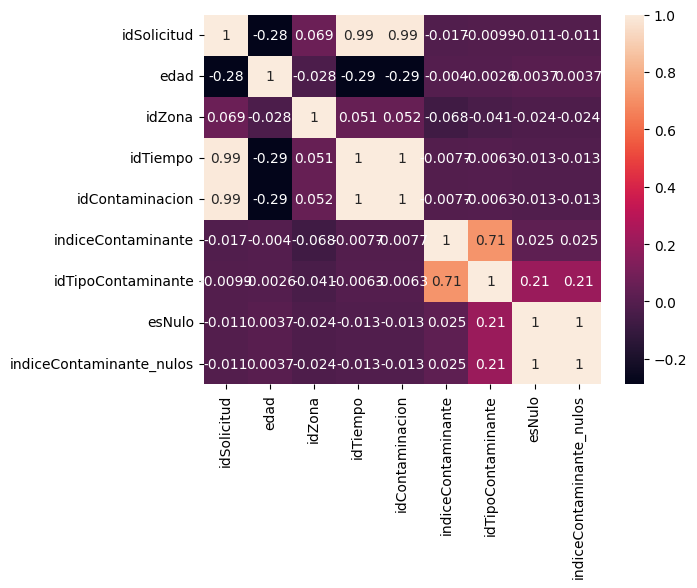

In [21]:
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# Graficarlo
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Forecasting con SARIMA

In [22]:
# Importamos librerias necesarias para SARIMA
# Librerias base
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

# Librerias de statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot: >

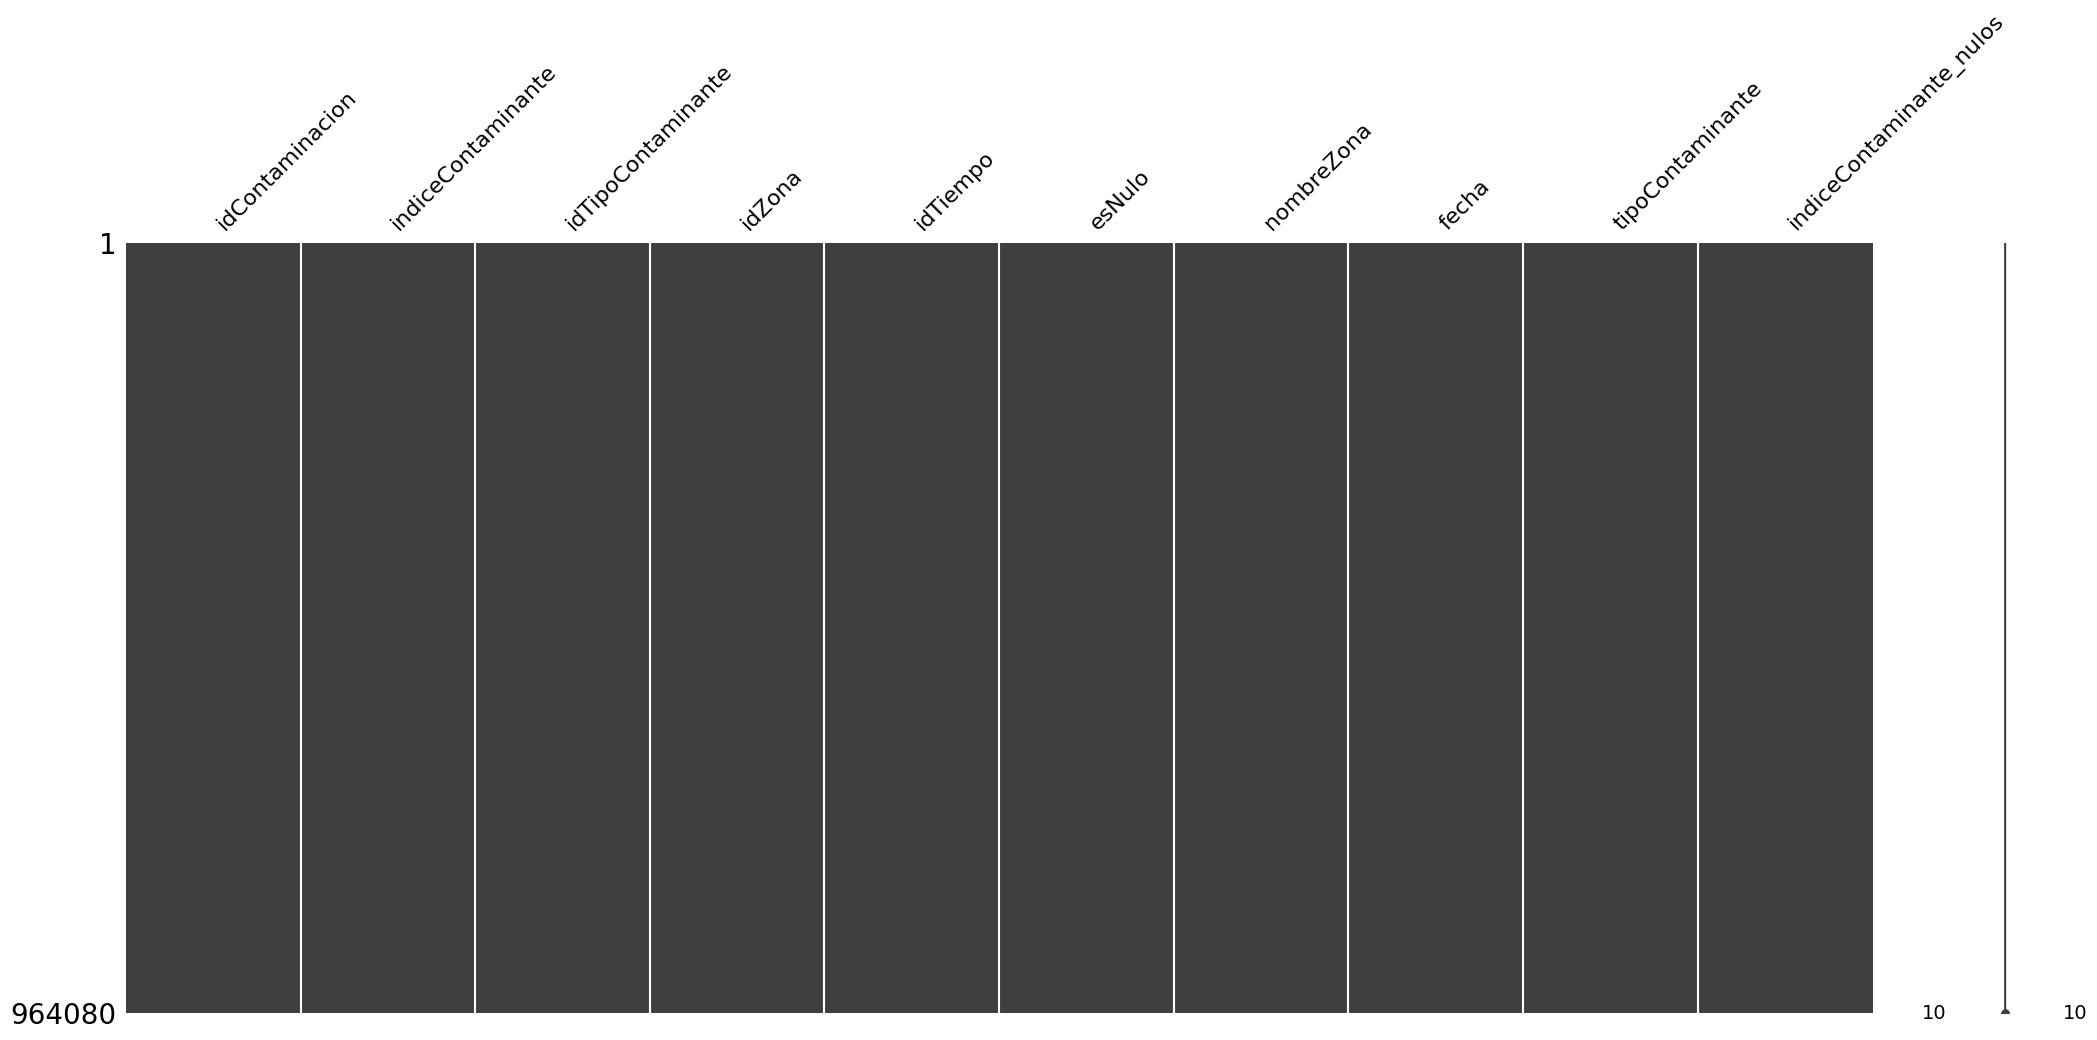

In [23]:
# Comprobamos, una vez mas si no hay nulos en el dataset
msno.matrix(indice_contaminacion)

In [24]:
## Verificamos los tipos de datos

indice_contaminacion.dtypes

idContaminacion                      int64
indiceContaminante                 float64
idTipoContaminante                   int64
idZona                               int64
idTiempo                             int64
esNulo                               int64
nombreZona                          object
fecha                       datetime64[ns]
tipoContaminante                    object
indiceContaminante_nulos              bool
dtype: object

In [25]:
## Verificamos las Zonas y los tipos de contaminantes
contaminantes = indice_contaminacion['tipoContaminante'].unique()
zonas = indice_contaminacion['nombreZona'].unique()

In [26]:
print("Los contaminantes son:", contaminantes)
print("Las zonas son:", zonas)

Los contaminantes son: ['ozono' 'dióxido de azufre' 'dióxido de nitrógeno' 'monóxido de carbono'
 'PM10' 'PM25']
Las zonas son: ['Noroeste' 'Noreste' 'Centro' 'Suroeste' 'Sureste']


In [27]:
# Cantidad de datos por contaminante
print("La cantidad de indices de contaminacion son", indice_contaminacion.groupby('tipoContaminante').count()['indiceContaminante'])

# Cantidad de datos por zona
print("La cantidad de datos por zona son", indice_contaminacion.groupby('nombreZona').count()['indiceContaminante'])

La cantidad de indices de contaminacion son tipoContaminante
PM10                    160680
PM25                    160680
dióxido de azufre       160680
dióxido de nitrógeno    160680
monóxido de carbono     160680
ozono                   160680
Name: indiceContaminante, dtype: int64
La cantidad de datos por zona son nombreZona
Centro      192816
Noreste     192816
Noroeste    192816
Sureste     192816
Suroeste    192816
Name: indiceContaminante, dtype: int64


In [28]:
# Aislamiento de los datos de cada contaminante por zona

# Centro
pm10_centro = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM10') & (indice_contaminacion['nombreZona'] == 'Centro')]
pm25_centro = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM25') & (indice_contaminacion['nombreZona'] == 'Centro')]
dioazureo_centro = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de azufre') & (indice_contaminacion['nombreZona'] == 'Centro')]
dioxnitro_centro = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Centro')]
monoxnitro_centro = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'monóxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Centro')]
ozono_centro = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'ozono') & (indice_contaminacion['nombreZona'] == 'Centro')]

# Noreste
pm10_noreste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM10') & (indice_contaminacion['nombreZona'] == 'Noreste')]
pm25_noreste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM25') & (indice_contaminacion['nombreZona'] == 'Noreste')]
dioazureo_noreste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de azufre') & (indice_contaminacion['nombreZona'] == 'Noreste')]
dioxnitro_noreste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Noreste')]
monoxnitro_noreste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'monóxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Noreste')]
ozono_noreste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'ozono') & (indice_contaminacion['nombreZona'] == 'Noreste')]

# Noroeste
pm10_noroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM10') & (indice_contaminacion['nombreZona'] == 'Noroeste')]
pm25_noroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM25') & (indice_contaminacion['nombreZona'] == 'Noroeste')]
dioazureo_noroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de azufre') & (indice_contaminacion['nombreZona'] == 'Noroeste')]
dioxnitro_noroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Noroeste')]
monoxnitro_noroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'monóxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Noroeste')]
ozono_noroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'ozono') & (indice_contaminacion['nombreZona'] == 'Noroeste')]

# Sureste
pm10_sureste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM10') & (indice_contaminacion['nombreZona'] == 'Sureste')]
pm25_sureste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM25') & (indice_contaminacion['nombreZona'] == 'Sureste')]
dioazureo_sureste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de azufre') & (indice_contaminacion['nombreZona'] == 'Sureste')]
dioxnitro_sureste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Sureste')]
monoxnitro_sureste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'monóxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Sureste')]
ozono_sureste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'ozono') & (indice_contaminacion['nombreZona'] == 'Sureste')]

# Suroeste
pm10_suroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM10') & (indice_contaminacion['nombreZona'] == 'Suroeste')]
pm25_suroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'PM25') & (indice_contaminacion['nombreZona'] == 'Suroeste')]
dioazureo_suroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de azufre') & (indice_contaminacion['nombreZona'] == 'Suroeste')]
dioxnitro_suroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'dióxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Suroeste')]
monoxnitro_suroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'monóxido de nitrógeno') & (indice_contaminacion['nombreZona'] == 'Suroeste')]
ozono_suroeste = indice_contaminacion[(indice_contaminacion['tipoContaminante'] == 'ozono') & (indice_contaminacion['nombreZona'] == 'Suroeste')]


In [29]:
# Verificamos que los datos se hayan cargado correctamente
pm10_centro

,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo,nombreZona,fecha,tipoContaminante,indiceContaminante_nulos
16,16,57.0,22,2,0,0,Centro,2019-01-01,PM10,False
46,46,63.0,22,2,1,0,Centro,2019-01-01,PM10,False
76,76,74.0,22,2,2,0,Centro,2019-01-01,PM10,False
106,106,84.0,22,2,3,0,Centro,2019-01-01,PM10,False
136,136,93.0,22,2,4,0,Centro,2019-01-01,PM10,False
...,...,...,...,...,...,...,...,...,...,...
963946,963946,36.0,10,2,32131,0,Centro,2022-08-31,PM10,False
963976,963976,36.0,10,2,32132,0,Centro,2022-08-31,PM10,False
964006,964006,36.0,10,2,32133,0,Centro,2022-08-31,PM10,False
964036,964036,36.0,10,2,32134,0,Centro,2022-08-31,PM10,False


In [30]:
# Definiendo indices

# Centro
pd.to_datetime(pm10_centro['fecha'], format='%Y-%m-%d')
pm10_centro.set_index('fecha', inplace=True)
pm10_centro.index = pd.to_datetime(pm10_centro.index)

pd.to_datetime(pm25_centro['fecha'], format='%Y-%m-%d')
pm25_centro .set_index('fecha', inplace=True)
pm25_centro .index = pd.to_datetime(pm25_centro .index)

pd.to_datetime(dioazureo_centro['fecha'], format='%Y-%m-%d')
dioazureo_centro.set_index('fecha', inplace=True)
dioazureo_centro.index = pd.to_datetime(dioazureo_centro.index)

pd.to_datetime(dioxnitro_centro['fecha'], format='%Y-%m-%d')
dioxnitro_centro.set_index('fecha', inplace=True)
dioxnitro_centro.index = pd.to_datetime(dioxnitro_centro.index)

pd.to_datetime(monoxnitro_centro['fecha'], format='%Y-%m-%d')
monoxnitro_centro.set_index('fecha', inplace=True)
monoxnitro_centro.index = pd.to_datetime(monoxnitro_centro.index)

pd.to_datetime(ozono_centro['fecha'], format='%Y-%m-%d')
ozono_centro.set_index('fecha', inplace=True)
ozono_centro.index = pd.to_datetime(ozono_centro.index)

# Noreste
pd.to_datetime(pm10_noreste['fecha'], format='%Y-%m-%d')
pm10_noreste.set_index('fecha', inplace=True)
pm10_noreste.index = pd.to_datetime(pm10_noreste.index)

pd.to_datetime(pm25_noreste['fecha'], format='%Y-%m-%d')
pm25_noreste.set_index('fecha', inplace=True)
pm25_noreste.index = pd.to_datetime(pm25_noreste.index)

pd.to_datetime(dioazureo_noreste['fecha'], format='%Y-%m-%d')
dioazureo_noreste.set_index('fecha', inplace=True)
dioazureo_noreste.index = pd.to_datetime(dioazureo_noreste.index)

pd.to_datetime(dioxnitro_noreste['fecha'], format='%Y-%m-%d')
dioxnitro_noreste.set_index('fecha', inplace=True)
dioxnitro_noreste.index = pd.to_datetime(dioxnitro_noreste.index)

pd.to_datetime(monoxnitro_noreste['fecha'], format='%Y-%m-%d')
monoxnitro_noreste.set_index('fecha', inplace=True)
monoxnitro_noreste.index = pd.to_datetime(monoxnitro_noreste.index)

pd.to_datetime(ozono_noreste['fecha'], format='%Y-%m-%d')
ozono_noreste.set_index('fecha', inplace=True)
ozono_noreste.index = pd.to_datetime(ozono_noreste.index)

# Noroeste
pd.to_datetime(pm10_noroeste['fecha'], format='%Y-%m-%d')
pm10_noroeste.set_index('fecha', inplace=True)
pm10_noroeste.index = pd.to_datetime(pm10_noroeste.index)

pd.to_datetime(pm25_noroeste['fecha'], format='%Y-%m-%d')
pm25_noroeste.set_index('fecha', inplace=True)
pm25_noroeste.index = pd.to_datetime(pm25_noroeste.index)

pd.to_datetime(dioazureo_noroeste['fecha'], format='%Y-%m-%d')
dioazureo_noroeste.set_index('fecha', inplace=True)
dioazureo_noroeste.index = pd.to_datetime(dioazureo_noroeste.index)

pd.to_datetime(dioxnitro_noroeste['fecha'], format='%Y-%m-%d')
dioxnitro_noroeste.set_index('fecha', inplace=True)
dioxnitro_noroeste.index = pd.to_datetime(dioxnitro_noroeste.index)

pd.to_datetime(monoxnitro_noroeste['fecha'], format='%Y-%m-%d')
monoxnitro_noroeste.set_index('fecha', inplace=True)
monoxnitro_noroeste.index = pd.to_datetime(monoxnitro_noroeste.index)

pd.to_datetime(ozono_noroeste['fecha'], format='%Y-%m-%d')
ozono_noroeste.set_index('fecha', inplace=True)
ozono_noroeste.index = pd.to_datetime(ozono_noroeste.index)

# Sureste
pd.to_datetime(pm10_sureste['fecha'], format='%Y-%m-%d')
pm10_sureste.set_index('fecha', inplace=True)
pm10_sureste.index = pd.to_datetime(pm10_sureste.index)

pd.to_datetime(pm25_sureste['fecha'], format='%Y-%m-%d')
pm25_sureste.set_index('fecha', inplace=True)
pm25_sureste.index = pd.to_datetime(pm25_sureste.index)

pd.to_datetime(dioazureo_sureste['fecha'], format='%Y-%m-%d')
dioazureo_sureste.set_index('fecha', inplace=True)
dioazureo_sureste.index = pd.to_datetime(dioazureo_sureste.index)

pd.to_datetime(dioxnitro_sureste['fecha'], format='%Y-%m-%d')
dioxnitro_sureste.set_index('fecha', inplace=True)
dioxnitro_sureste.index = pd.to_datetime(dioxnitro_sureste.index)

pd.to_datetime(monoxnitro_sureste['fecha'], format='%Y-%m-%d')
monoxnitro_sureste.set_index('fecha', inplace=True)
monoxnitro_sureste.index = pd.to_datetime(monoxnitro_sureste.index)

pd.to_datetime(ozono_sureste['fecha'], format='%Y-%m-%d')
ozono_sureste.set_index('fecha', inplace=True)
ozono_sureste.index = pd.to_datetime(ozono_sureste.index)

# Suroeste
pd.to_datetime(pm10_suroeste['fecha'], format='%Y-%m-%d')
pm10_suroeste.set_index('fecha', inplace=True)
pm10_suroeste.index = pd.to_datetime(pm10_suroeste.index)

pd.to_datetime(pm25_suroeste['fecha'], format='%Y-%m-%d')
pm25_suroeste.set_index('fecha', inplace=True)
pm25_suroeste.index = pd.to_datetime(pm25_suroeste.index)

pd.to_datetime(dioazureo_suroeste['fecha'], format='%Y-%m-%d')
dioazureo_suroeste.set_index('fecha', inplace=True)
dioazureo_suroeste.index = pd.to_datetime(dioazureo_suroeste.index)

pd.to_datetime(dioxnitro_suroeste['fecha'], format='%Y-%m-%d')
dioxnitro_suroeste.set_index('fecha', inplace=True)
dioxnitro_suroeste.index = pd.to_datetime(dioxnitro_suroeste.index)

pd.to_datetime(monoxnitro_suroeste['fecha'], format='%Y-%m-%d')
monoxnitro_suroeste.set_index('fecha', inplace=True)
monoxnitro_suroeste.index = pd.to_datetime(monoxnitro_suroeste.index)

pd.to_datetime(ozono_suroeste['fecha'], format='%Y-%m-%d')
ozono_suroeste.set_index('fecha', inplace=True)
ozono_suroeste.index = pd.to_datetime(ozono_suroeste.index)

In [33]:
# Verificando si hay indices duplicados
pm10_noroeste


,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo,nombreZona,tipoContaminante,indiceContaminante_nulos
fecha,,,,,,,,,
2019-01-01,4,64.0,22,0,0,0,Noroeste,PM10,False
2019-01-01,34,70.0,22,0,1,0,Noroeste,PM10,False
2019-01-01,64,77.0,22,0,2,0,Noroeste,PM10,False
2019-01-01,94,91.0,22,0,3,0,Noroeste,PM10,False
2019-01-01,124,101.0,28,0,4,0,Noroeste,PM10,False
...,...,...,...,...,...,...,...,...,...
2022-08-31,963934,44.0,16,0,32131,0,Noroeste,PM10,False
2022-08-31,963964,44.0,16,0,32132,0,Noroeste,PM10,False
2022-08-31,963994,44.0,16,0,32133,0,Noroeste,PM10,False


# Hay una tendencia al alza desde 2020 y sigue en aumento hasta 2022

### Graficos de PM25 Por Zona, agrugpando años y meses

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1101670493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_centro['month'] = pd.to_datetime(pm25_centro.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1101670493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_centro['year'] = pd.to_datetime(pm25_centro.index).year


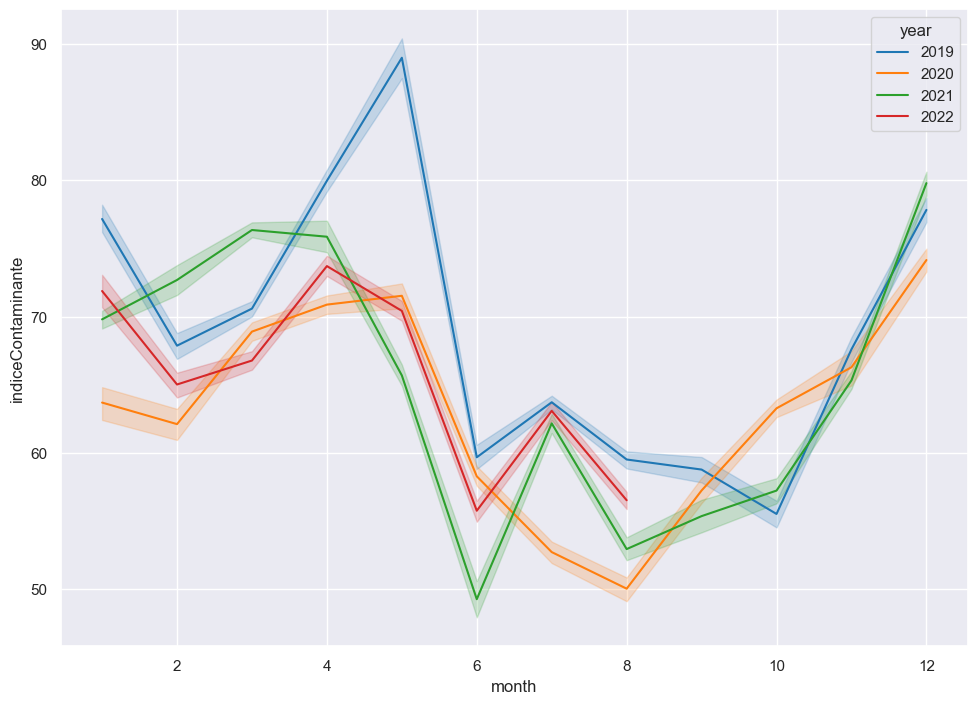

In [51]:
pm25_centro['month'] = pd.to_datetime(pm25_centro.index).month
pm25_centro['year'] = pd.to_datetime(pm25_centro.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm25_centro, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\3260078292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_noreste['month'] = pd.to_datetime(pm25_noreste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\3260078292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_noreste['year'] = pd.to_datetime(pm25_noreste.index).year


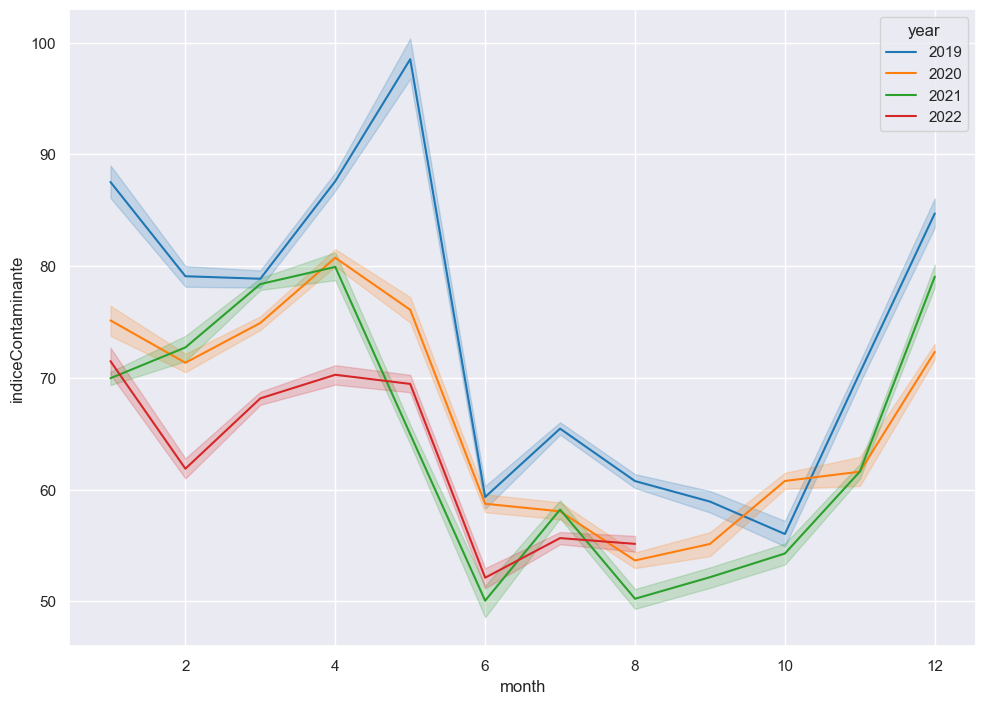

In [45]:
pm25_noreste['month'] = pd.to_datetime(pm25_noreste.index).month
pm25_noreste['year'] = pd.to_datetime(pm25_noreste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm25_noreste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\3213607186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_noroeste['month'] = pd.to_datetime(pm25_noroeste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\3213607186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_noroeste['year'] = pd.to_datetime(pm25_noroeste.index).year


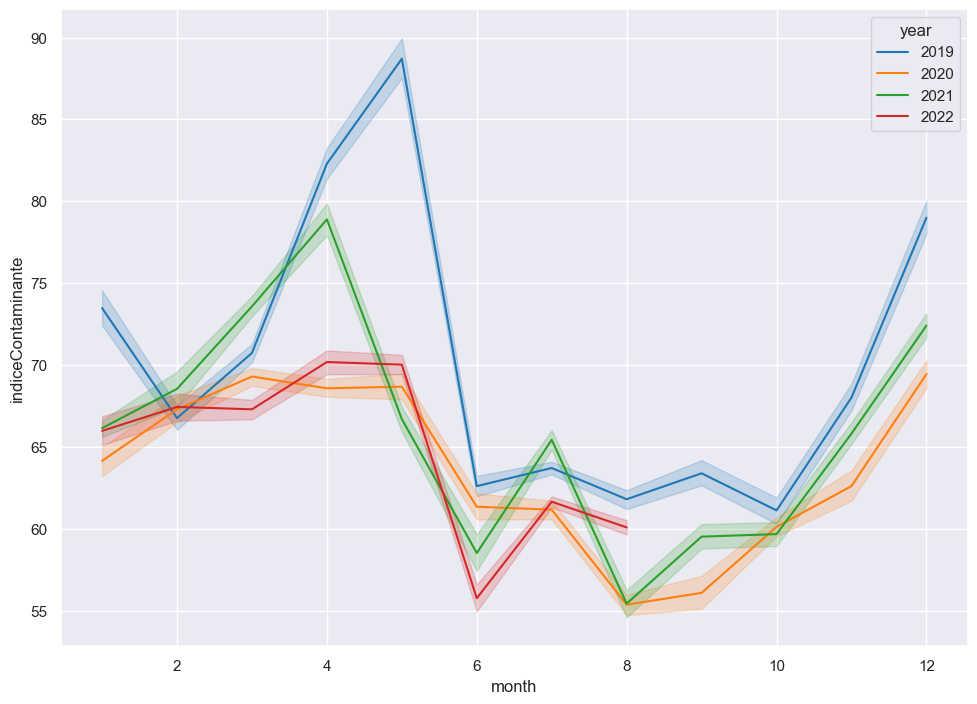

In [46]:
pm25_noroeste['month'] = pd.to_datetime(pm25_noroeste.index).month
pm25_noroeste['year'] = pd.to_datetime(pm25_noroeste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm25_noroeste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\2696728183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_sureste['month'] = pd.to_datetime(pm25_sureste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\2696728183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_sureste['year'] = pd.to_datetime(pm25_sureste.index).year


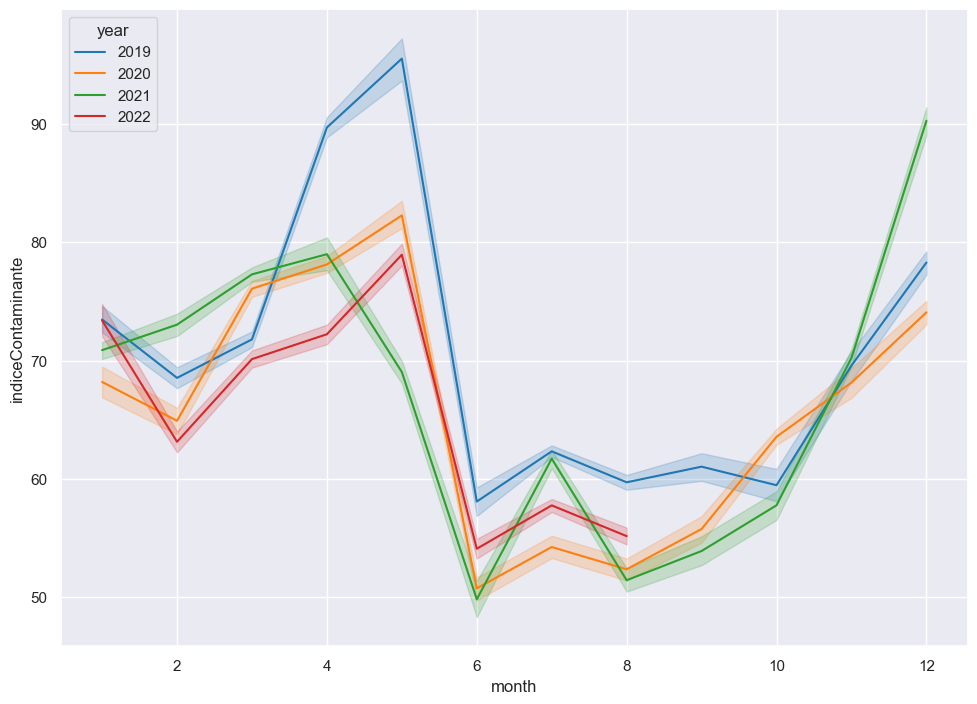

In [47]:
pm25_sureste['month'] = pd.to_datetime(pm25_sureste.index).month
pm25_sureste['year'] = pd.to_datetime(pm25_sureste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm25_sureste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1948786454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_suroeste['month'] = pd.to_datetime(pm25_suroeste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1948786454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_suroeste['year'] = pd.to_datetime(pm25_suroeste.index).year


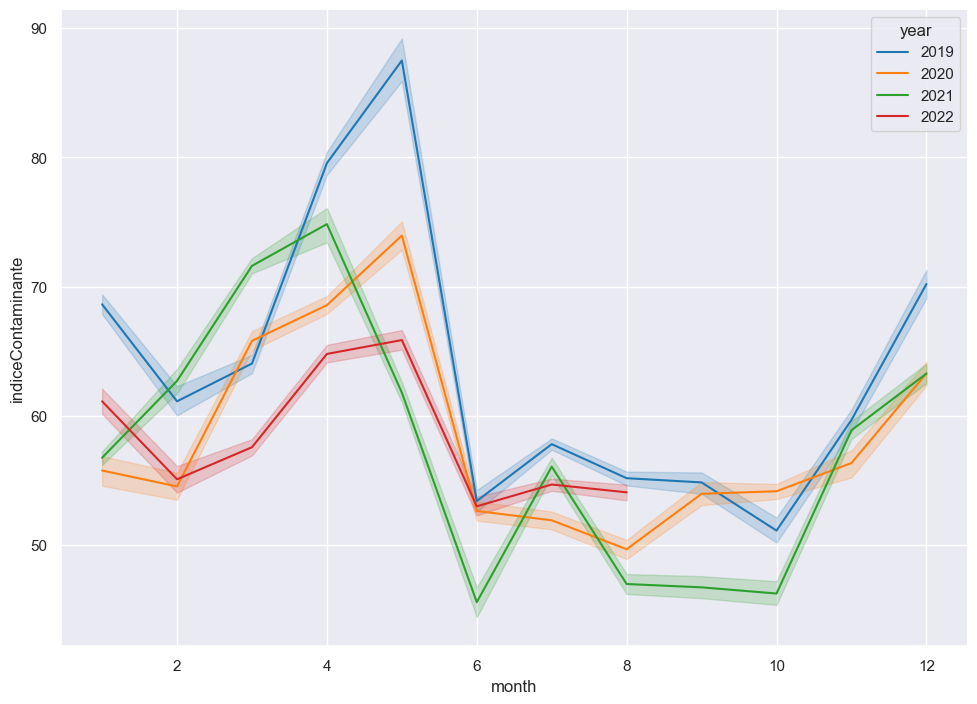

In [49]:
pm25_suroeste['month'] = pd.to_datetime(pm25_suroeste.index).month
pm25_suroeste['year'] = pd.to_datetime(pm25_suroeste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm25_suroeste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Graficos de PM10 Por Zona, agrugpando años y meses

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\307279214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_centro['month'] = pd.to_datetime(pm10_centro.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\307279214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_centro['year'] = pd.to_datetime(pm10_centro.index).year


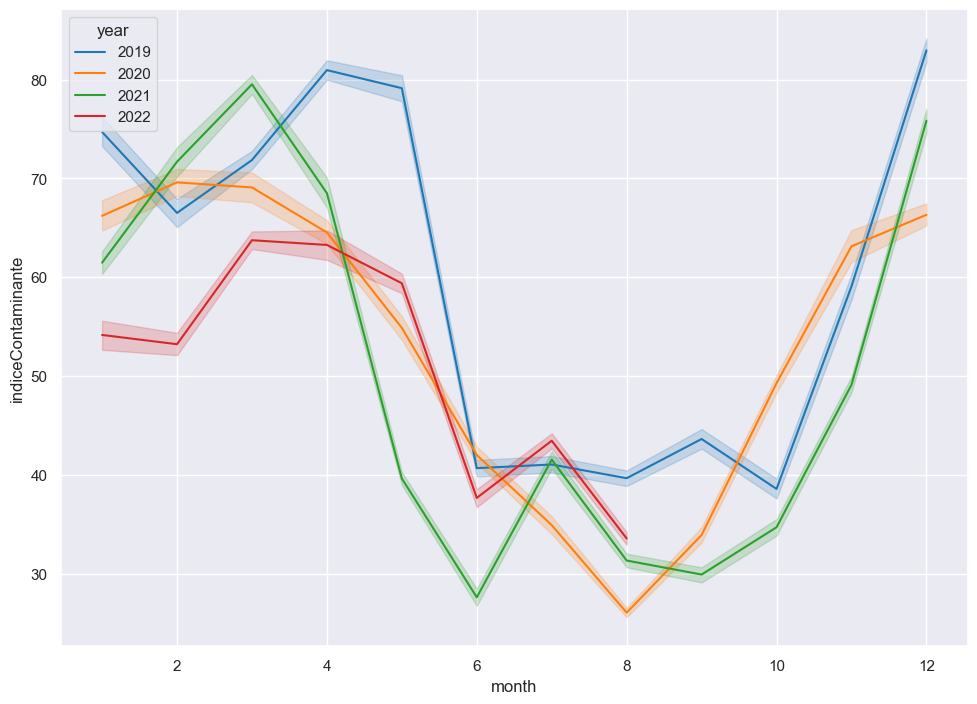

In [52]:
# Centro PM10
pm10_centro['month'] = pd.to_datetime(pm10_centro.index).month
pm10_centro['year'] = pd.to_datetime(pm10_centro.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm10_centro, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})


C:\Users\josev\AppData\Local\Temp\ipykernel_13412\2724494887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_noroeste['month'] = pd.to_datetime(pm10_noroeste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\2724494887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_noroeste['year'] = pd.to_datetime(pm10_noroeste.index).year


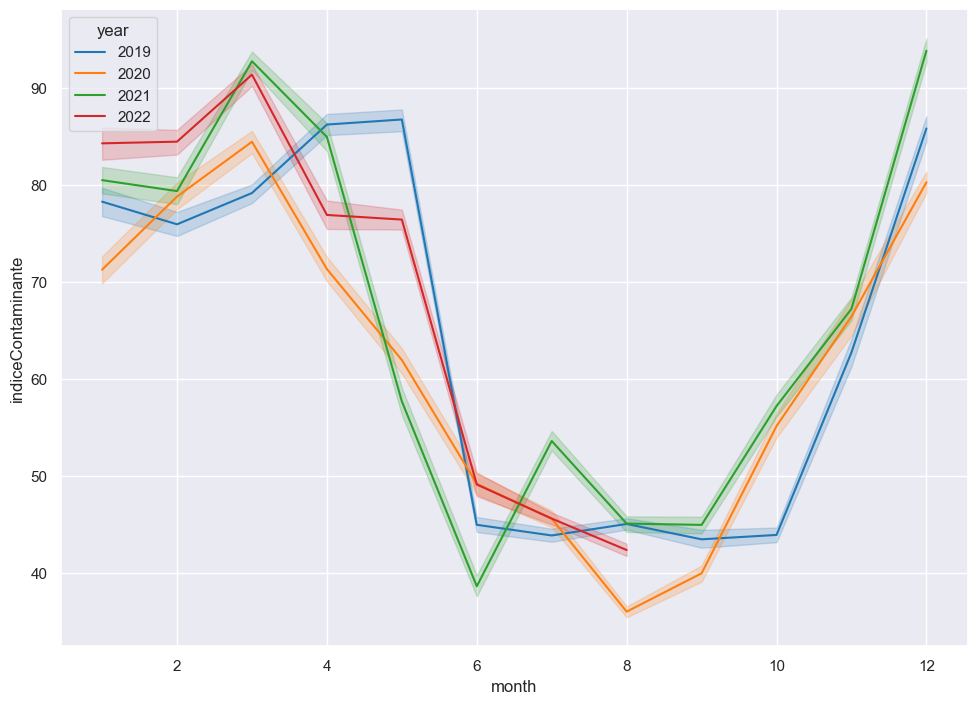

In [53]:
# Noroeste PM10
pm10_noroeste['month'] = pd.to_datetime(pm10_noroeste.index).month
pm10_noroeste['year'] = pd.to_datetime(pm10_noroeste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm10_noroeste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1527508122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_noreste['month'] = pd.to_datetime(pm10_noreste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1527508122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_noreste['year'] = pd.to_datetime(pm10_noreste.index).year


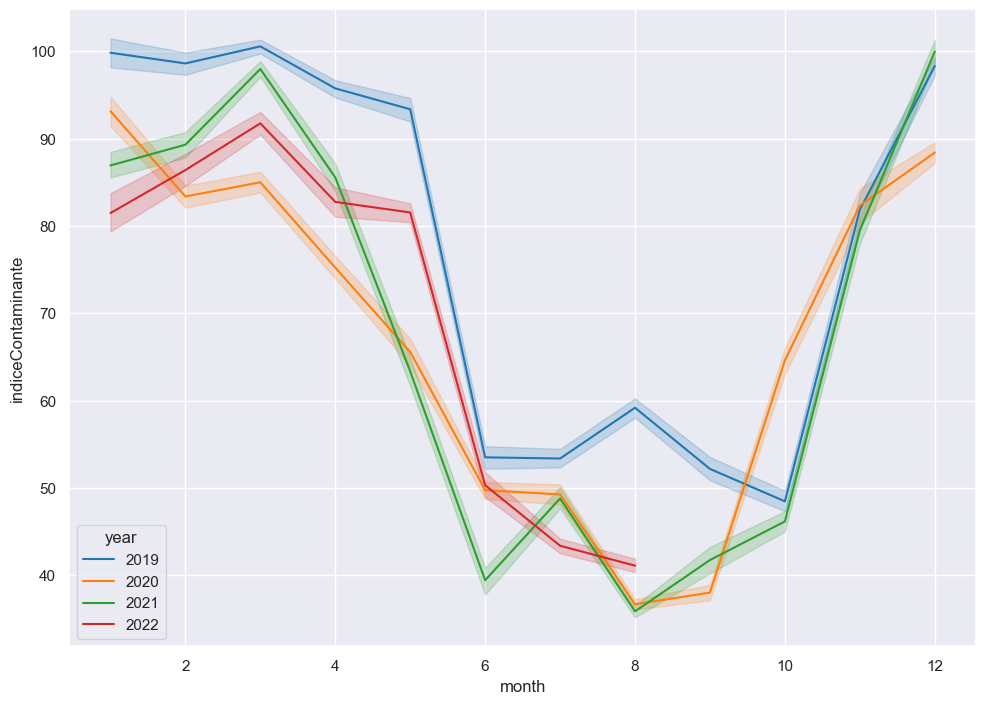

In [54]:
# Noreste PM10
pm10_noreste['month'] = pd.to_datetime(pm10_noreste.index).month
pm10_noreste['year'] = pd.to_datetime(pm10_noreste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm10_noreste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1088032690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_sureste['month'] = pd.to_datetime(pm10_sureste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\1088032690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_sureste['year'] = pd.to_datetime(pm10_sureste.index).year


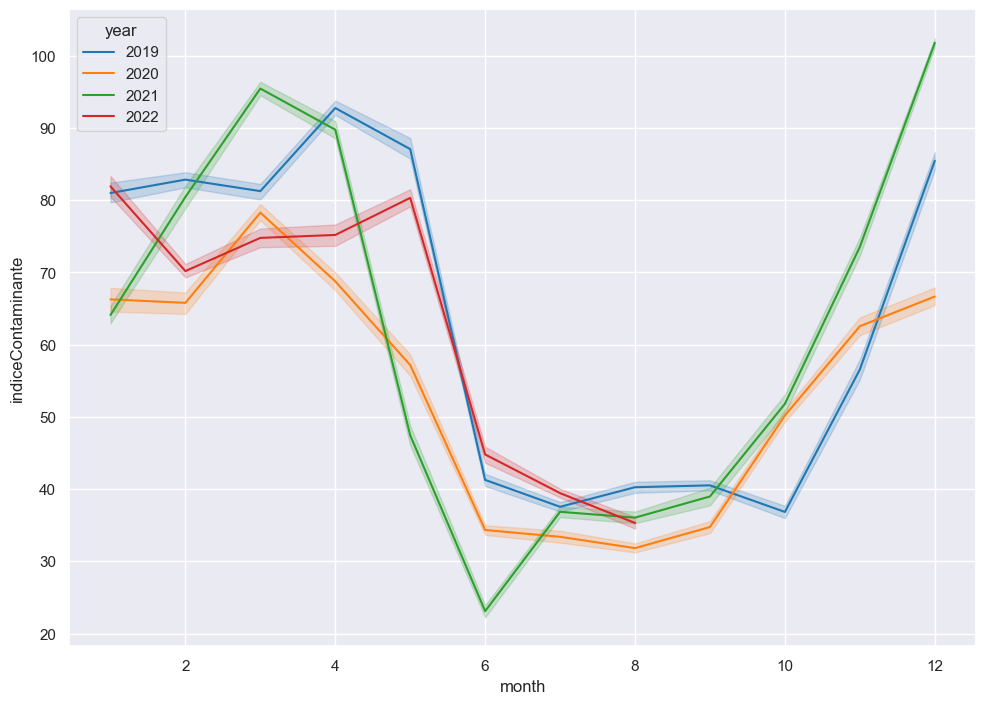

In [55]:
# Sureste PM10
pm10_sureste['month'] = pd.to_datetime(pm10_sureste.index).month
pm10_sureste['year'] = pd.to_datetime(pm10_sureste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm10_sureste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})


C:\Users\josev\AppData\Local\Temp\ipykernel_13412\2649661025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_suroeste['month'] = pd.to_datetime(pm10_suroeste.index).month
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\2649661025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_suroeste['year'] = pd.to_datetime(pm10_suroeste.index).year


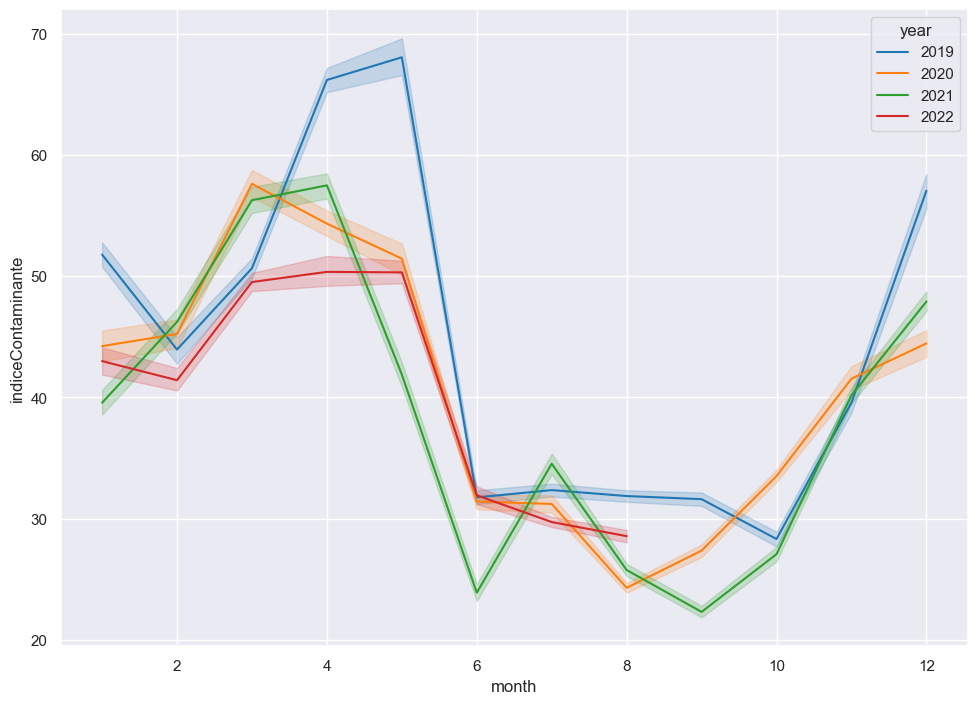

In [56]:
# Suroeste PM10
pm10_suroeste['month'] = pd.to_datetime(pm10_suroeste.index).month
pm10_suroeste['year'] = pd.to_datetime(pm10_suroeste.index).year
sns.lineplot(x='month', y='indiceContaminante', hue='year', data=pm10_suroeste, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})


C:\Users\josev\AppData\Local\Temp\ipykernel_13412\3210378609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  indice_contaminacion.corr()
C:\Users\josev\AppData\Local\Temp\ipykernel_13412\3210378609.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(indice_contaminacion.corr(), annot=True, fmt='.0%')


<AxesSubplot: >

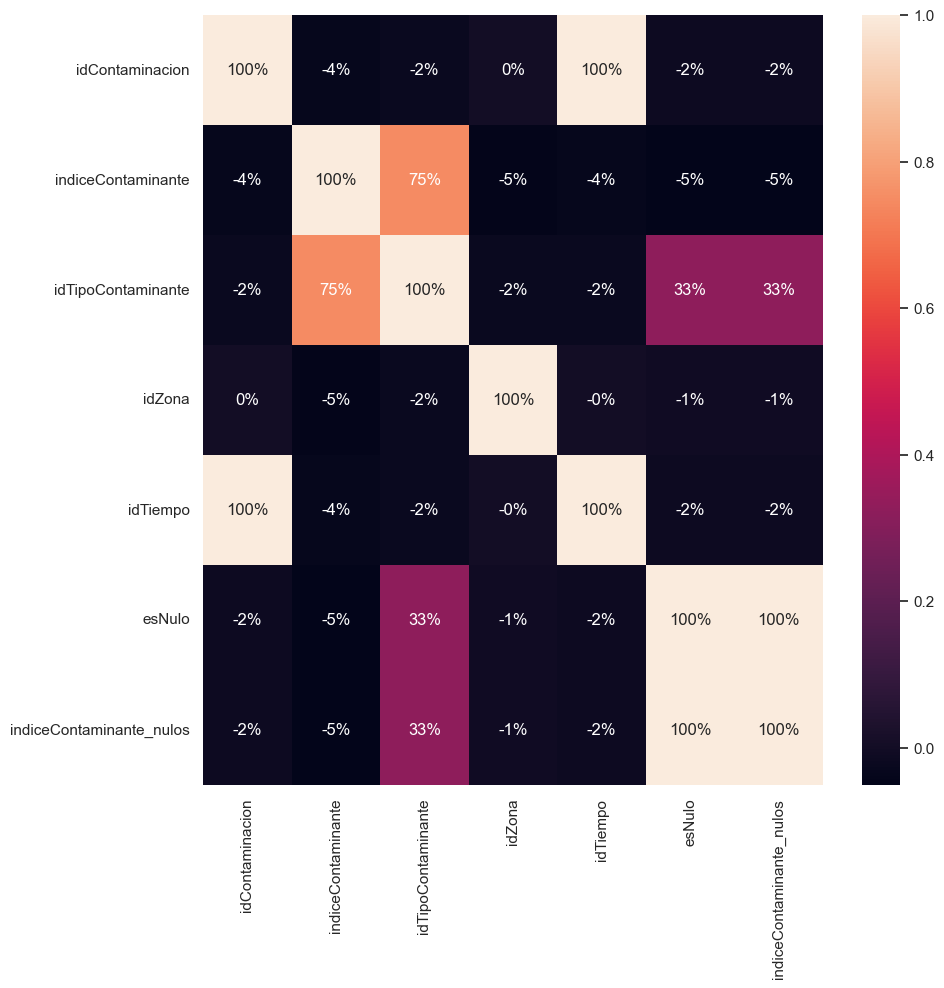

In [40]:
# Hacer correlacion del dataset con el indice de contaminacion
indice_contaminacion.corr()

#Plot de correlacion
plt.figure(figsize=(10,10))
sns.heatmap(indice_contaminacion.corr(), annot=True, fmt='.0%')

